In [10]:
# Here we are just reading all the text and storing the words into the variable
words = open("names.txt", 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [11]:
import torch

In [12]:
N = torch.zeros((27,27), dtype=torch.int32)


In [21]:
# Making a lookup table for all the characters including the start and end

chars = sorted(list(set((''.join(words)))))
stoi= {ch: i+1 for i, ch in enumerate(chars)}
stoi['.'] = 0

In [22]:
# Here we will incorporate the start and end of the word for every word in the list
b = {}
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1, ix2 = stoi[ch1], stoi[ch2]
        N[ix1, ix2] += 1 # here N is a 28 by 28 matrix and for each occurernce of a bigram we are incrementing the count by 1

# sorted(b.items(), key=lambda x: x[1], reverse=True)


In [26]:
itos = {i: s for s, i in stoi.items()}
N[:5, :5]


tensor([[11606,  6257,  3318,  4274,  3913],
        [ 7075,   594,   542,   535,  1697],
        [ 1026,   321,    80,     2,   616],
        [ 1916,   816,     3,   191,  1284],
        [ 5178,  1424,   154,   387,  1420]], dtype=torch.int32)

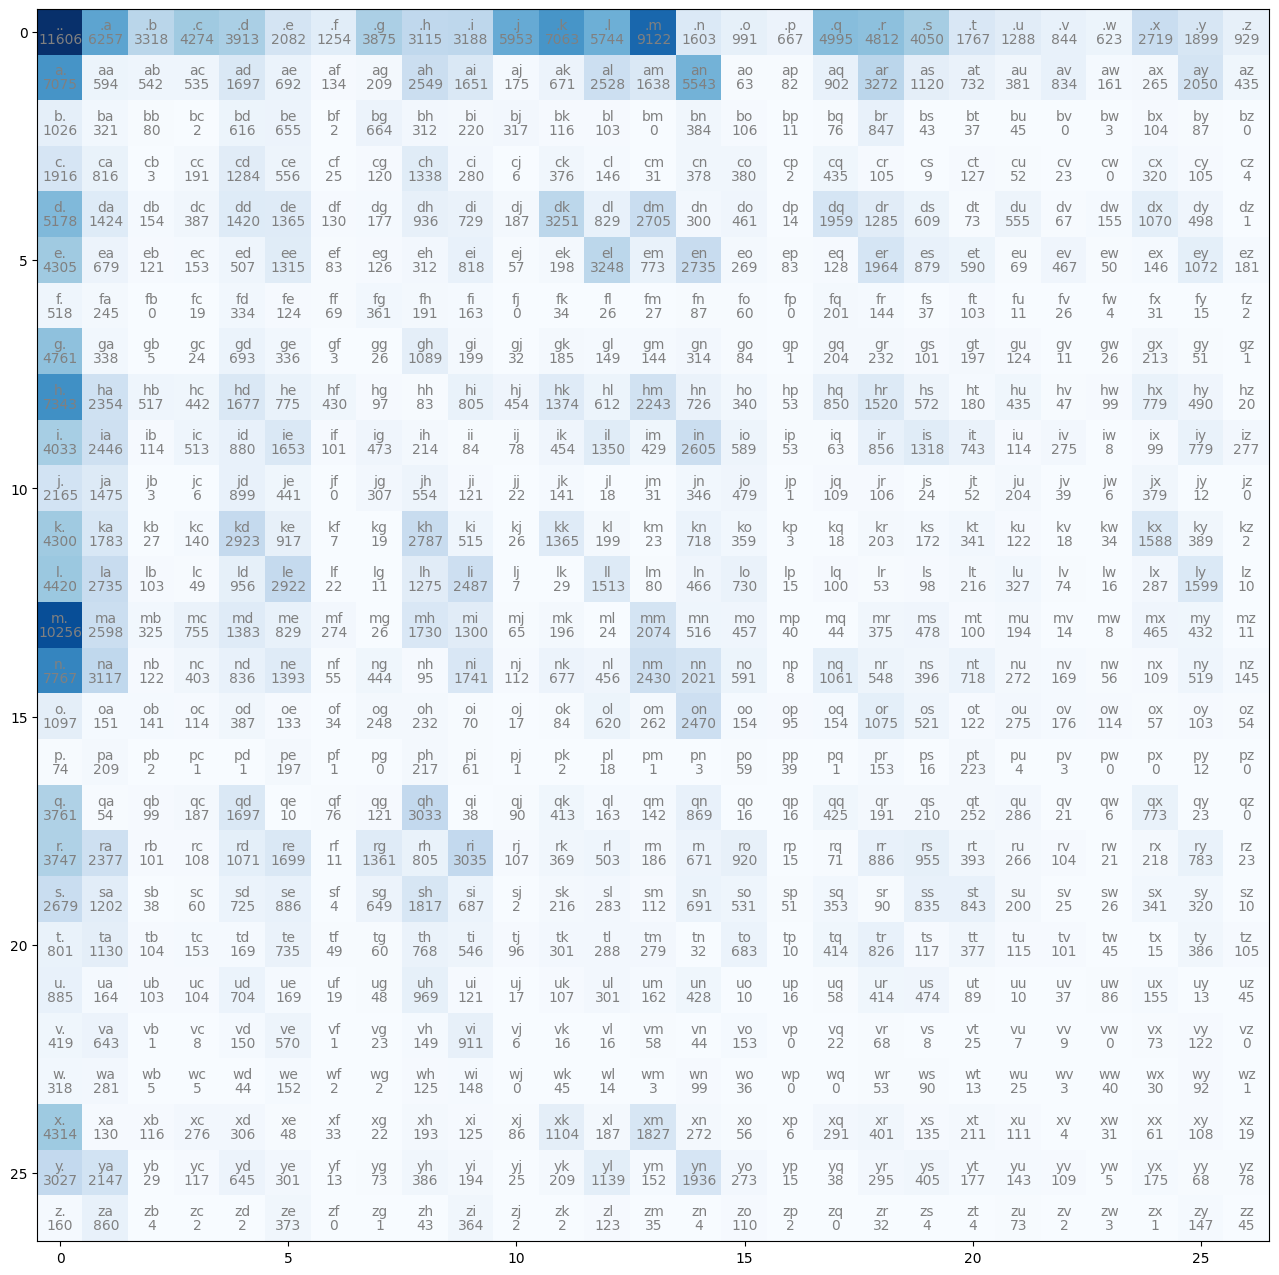

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr =itos[i] + itos[j]

        plt.text(j, i, chstr, ha='center', va='bottom',color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top',color='gray')